In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-9.943586325478933 -175.3682200581115
-59.68675178862162 -34.23443945831971
83.04759971303378 -69.79551856061134
-47.359611406779095 87.46756227813086
-46.425904848546296 160.66659238868357
67.56596369827611 107.26748517574657
43.66420452010644 -125.25163237609449
-87.62357994949116 14.285825175618982
-19.94396102444 -106.3324193354711
-53.92524278883793 45.72611551703773
-66.41503083121847 -5.502291735681013
53.297574393333576 172.7251191160143
84.32232993415454 -81.48704912361576
-17.628417801728688 79.74143018771878
84.13583286043229 59.949339828274304
87.03828706652058 157.6660616637448
-68.92407635008462 -177.99548019118143
-17.949742412935606 -54.94417005534912
-51.910591850349775 -132.64611829930487
78.06115342046118 64.6916602218441
49.69903978052102 -0.5788674309062856
-53.913709430428064 38.57389726252072
-14.812358529431734 166.24771034323555
26.760256864697197 -68.73253992236289
64.48090705136337 164.850409073665
85.47618440708942 13.538334957608981
-79.64123111177229 -119.

In [7]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

593

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | tuatapere
Processing Record 6 of Set 1 | aykhal
Processing Record 7 of Set 1 | north bend
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | coxim
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | bayeux
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | luganville
Processing Record 2

Processing Record 36 of Set 4 | kushmurun
Processing Record 37 of Set 4 | port moresby
Processing Record 38 of Set 4 | los llanos de aridane
Processing Record 39 of Set 4 | faya
Processing Record 40 of Set 4 | pisco
Processing Record 41 of Set 4 | salinopolis
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | nago
Processing Record 44 of Set 4 | santana
Processing Record 45 of Set 4 | tonstad
Processing Record 46 of Set 4 | carauari
Processing Record 47 of Set 4 | bow island
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | khatanga
Processing Record 50 of Set 4 | gazimurskiy zavod
Processing Record 1 of Set 5 | yatou
Processing Record 2 of Set 5 | chimore
Processing Record 3 of Set 5 | svetlyy
Processing Record 4 of Set 5 | launceston
Processing Record 5 of Set 5 | pomabamba
Processing Record 6 of Set 5 | hamilton
Processing Record 7 of Set 5 | alekseyevsk
Processing Record 8 of Set 5 | atar
Processing Record 9 of Set 5 | tura
Processing Record

Processing Record 26 of Set 8 | ellensburg
Processing Record 27 of Set 8 | barretos
Processing Record 28 of Set 8 | xuddur
Processing Record 29 of Set 8 | margate
Processing Record 30 of Set 8 | kuusamo
Processing Record 31 of Set 8 | zaoyang
Processing Record 32 of Set 8 | mantua
Processing Record 33 of Set 8 | kashi
Processing Record 34 of Set 8 | te anau
Processing Record 35 of Set 8 | charlestown
Processing Record 36 of Set 8 | tautira
Processing Record 37 of Set 8 | petropavl
Processing Record 38 of Set 8 | kelvington
Processing Record 39 of Set 8 | moindou
Processing Record 40 of Set 8 | tilichiki
Processing Record 41 of Set 8 | katherine
Processing Record 42 of Set 8 | barra do garcas
Processing Record 43 of Set 8 | safaqis
City not found. Skipping...
Processing Record 44 of Set 8 | port macquarie
Processing Record 45 of Set 8 | reitz
Processing Record 46 of Set 8 | udachnyy
Processing Record 47 of Set 8 | fayaoue
Processing Record 48 of Set 8 | rutul
Processing Record 49 of Set

Processing Record 15 of Set 12 | bam
Processing Record 16 of Set 12 | sao gabriel da cachoeira
Processing Record 17 of Set 12 | durazno
Processing Record 18 of Set 12 | umarkot
Processing Record 19 of Set 12 | dunda
Processing Record 20 of Set 12 | el bagre
Processing Record 21 of Set 12 | flin flon
Processing Record 22 of Set 12 | bambari
Processing Record 23 of Set 12 | aloleng
Processing Record 24 of Set 12 | sobolevo
Processing Record 25 of Set 12 | havre-saint-pierre
Processing Record 26 of Set 12 | juneau
Processing Record 27 of Set 12 | umm durman
City not found. Skipping...
Processing Record 28 of Set 12 | ambatofinandrahana
Processing Record 29 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 30 of Set 12 | chongqing
Processing Record 31 of Set 12 | kingsport
Processing Record 32 of Set 12 | nizhniy baskunchak
Processing Record 33 of Set 12 | upata
Processing Record 34 of Set 12 | cuenca
Processing Record 35 of Set 12 | krasnyy chikoy
Processing Record 36 of S

In [14]:
len(city_data)

549

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,51.10,81,0,11.99,AR,2022-07-11 07:32:11
1,Qaanaaq,77.4840,-69.3632,39.87,94,100,1.92,GL,2022-07-11 07:33:33
2,Busselton,-33.6500,115.3333,59.49,66,70,5.14,AU,2022-07-11 07:33:34
3,Tuatapere,-46.1333,167.6833,35.06,86,45,4.43,NZ,2022-07-11 07:33:34
4,Aykhal,66.0000,111.5000,57.07,87,100,4.54,RU,2022-07-11 07:33:34
5,North Bend,43.4065,-124.2243,59.92,96,0,4.61,US,2022-07-11 07:30:03
6,Bredasdorp,-34.5322,20.0403,54.23,78,100,6.49,ZA,2022-07-11 07:33:35
7,Puerto Ayora,-0.7393,-90.3518,67.55,99,97,5.99,EC,2022-07-11 07:33:35
8,East London,-33.0153,27.9116,59.94,67,0,10.36,ZA,2022-07-11 07:33:35
9,Cape Town,-33.9258,18.4232,55.89,81,75,16.11,ZA,2022-07-11 07:28:49


In [29]:
# re order df

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mar Del Plata,AR,2022-07-11 07:32:11,-38.0023,-57.5575,51.10,81,0,11.99
1,Qaanaaq,GL,2022-07-11 07:33:33,77.4840,-69.3632,39.87,94,100,1.92
2,Busselton,AU,2022-07-11 07:33:34,-33.6500,115.3333,59.49,66,70,5.14
3,Tuatapere,NZ,2022-07-11 07:33:34,-46.1333,167.6833,35.06,86,45,4.43
4,Aykhal,RU,2022-07-11 07:33:34,66.0000,111.5000,57.07,87,100,4.54
...,...,...,...,...,...,...,...,...,...
544,Verkhoyansk,RU,2022-07-11 07:47:19,67.5447,133.3850,57.25,96,100,4.90
545,Santa Lucia,ES,2022-07-11 07:47:20,27.9117,-15.5407,76.32,24,20,26.46
546,Shimoda,JP,2022-07-11 07:44:46,34.6667,138.9500,82.76,84,78,4.00
547,Karratha,AU,2022-07-11 07:47:20,-20.7377,116.8463,76.01,29,5,12.41


In [30]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [31]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

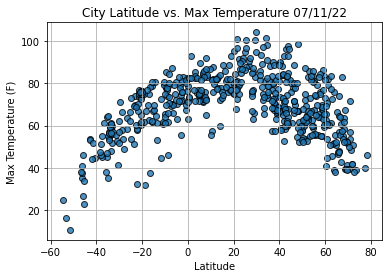

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

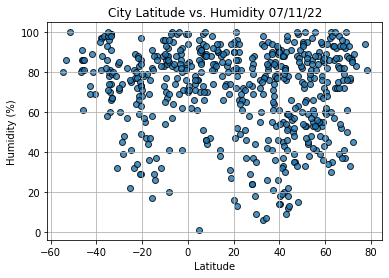

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

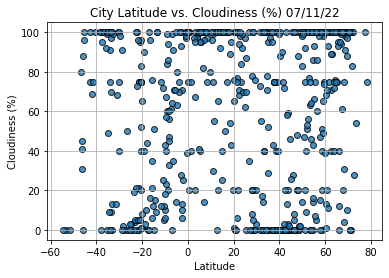

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

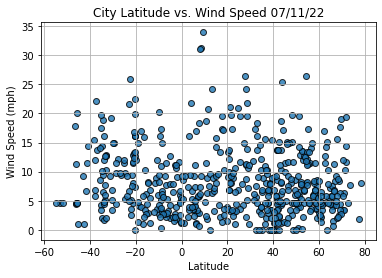

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [15]:
# read city data csv
city_data_df = pd.read_csv("weather_data/cities.csv")

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Mar Del Plata,AR,2022-07-11 07:32:11,-38.0023,-57.5575,51.10,81,0,11.99
1,1,Qaanaaq,GL,2022-07-11 07:33:33,77.4840,-69.3632,39.87,94,100,1.92
2,2,Busselton,AU,2022-07-11 07:33:34,-33.6500,115.3333,59.49,66,70,5.14
3,3,Tuatapere,NZ,2022-07-11 07:33:34,-46.1333,167.6833,35.06,86,45,4.43
4,4,Aykhal,RU,2022-07-11 07:33:34,66.0000,111.5000,57.07,87,100,4.54
...,...,...,...,...,...,...,...,...,...,...
544,544,Verkhoyansk,RU,2022-07-11 07:47:19,67.5447,133.3850,57.25,96,100,4.90
545,545,Santa Lucia,ES,2022-07-11 07:47:20,27.9117,-15.5407,76.32,24,20,26.46
546,546,Shimoda,JP,2022-07-11 07:44:46,34.6667,138.9500,82.76,84,78,4.00
547,547,Karratha,AU,2022-07-11 07:47:20,-20.7377,116.8463,76.01,29,5,12.41


In [53]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [44]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                        Vaini
Country                        TO
Date          2022-07-11 07:33:37
Lat                         -21.2
Lng                        -175.2
Max Temp                    75.36
Humidity                       83
Cloudiness                     75
Wind Speed                   11.5
Name: 13, dtype: object

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Qaanaaq,GL,2022-07-11 07:33:33,77.4840,-69.3632,39.87,94,100,1.92
4,4,Aykhal,RU,2022-07-11 07:33:34,66.0000,111.5000,57.07,87,100,4.54
5,5,North Bend,US,2022-07-11 07:30:03,43.4065,-124.2243,59.92,96,0,4.61
10,10,Nikolskoye,RU,2022-07-11 07:33:36,59.7035,30.7861,72.88,60,100,5.41
12,12,Cherskiy,RU,2022-07-11 07:33:37,68.7500,161.3000,67.17,37,91,8.41


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Qaanaaq,GL,2022-07-11 07:33:33,77.4840,-69.3632,39.87,94,100,1.92
4,4,Aykhal,RU,2022-07-11 07:33:34,66.0000,111.5000,57.07,87,100,4.54
5,5,North Bend,US,2022-07-11 07:30:03,43.4065,-124.2243,59.92,96,0,4.61
10,10,Nikolskoye,RU,2022-07-11 07:33:36,59.7035,30.7861,72.88,60,100,5.41
12,12,Cherskiy,RU,2022-07-11 07:33:37,68.7500,161.3000,67.17,37,91,8.41


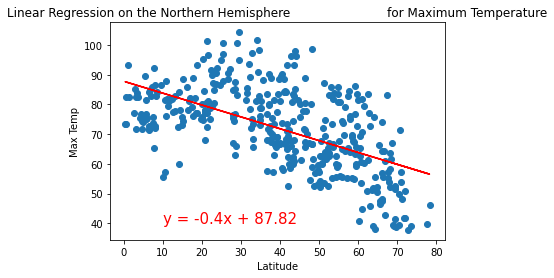

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

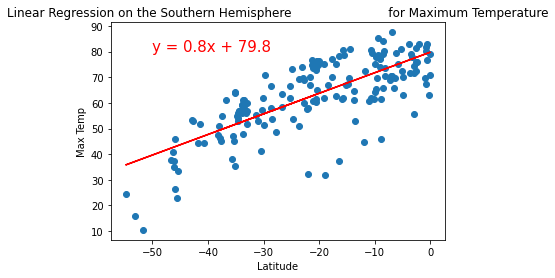

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

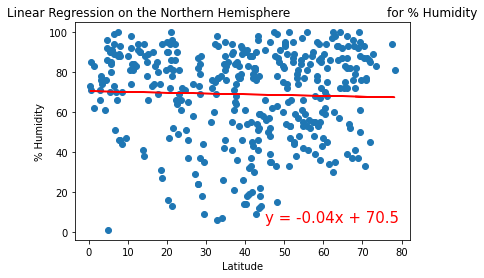

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

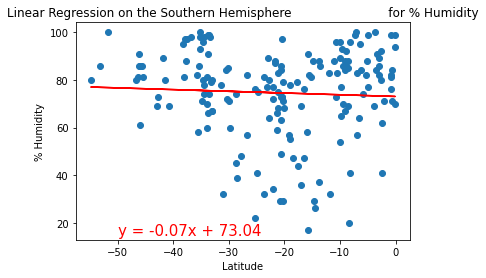

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

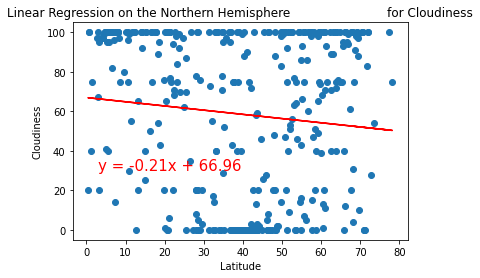

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(3,30))

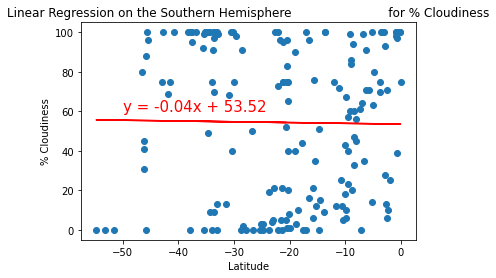

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

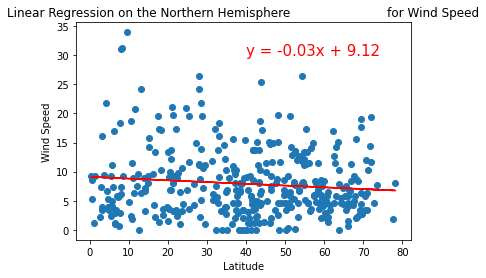

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))

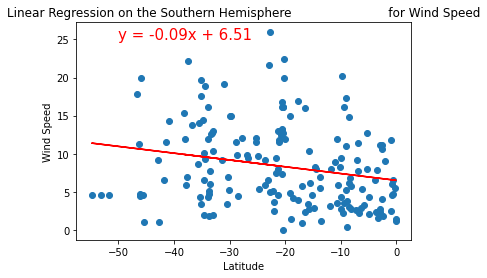

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))